<a href="https://colab.research.google.com/github/AmeerMohammadJafari/TensorFlow-and-Keras-mini-projects/blob/main/03_Reuters/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [6]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [8]:
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)

In [9]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [10]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [11]:
y_train, y_test = to_one_hot(train_labels), to_one_hot(test_labels)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
import matplotlib.pyplot as plt
def plot_losses(history_dict):
    train_loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(train_loss_values) + 1)
    plt.plot(epochs, train_loss_values, 'r', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title("Losses")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracies(history_dict):
    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1/20
18/18 [==============================] - 2s 81ms/step - loss: 2.5353 - accuracy: 0.4948 - val_loss: 1.7411 - val_accuracy: 0.6438
Epoch 2/20
18/18 [==============================] - 1s 53ms/step - loss: 1.4573 - accuracy: 0.6886 - val_loss: 1.4070 - val_accuracy: 0.6785
Epoch 3/20
18/18 [==============================] - 2s 92ms/step - loss: 1.1487 - accuracy: 0.7476 - val_loss: 1.2384 - val_accuracy: 0.7262
Epoch 4/20
18/18 [==============================] - 2s 94ms/step - loss: 0.9522 - accuracy: 0.7917 - val_loss: 1.1358 - val_accuracy: 0.7516
Epoch 5/20
18/18 [==============================] - 1s 55ms/step - loss: 0.7890 - accuracy: 0.8278 - val_loss: 1.0380 - val_accuracy: 0.7729
Epoch 6/20
18/18 [==============================] - 1s 54ms/step - loss: 0.6558 - accuracy: 0.8601 - val_loss: 0.9862 - val_accuracy: 0.7832
Epoch 7/20
18/18 [==============================] - 1s 53ms/step - loss: 0.5461 - accuracy: 0.8824 - val_loss: 0.9442 - val_accuracy: 0.7885
Epoch 8/20
18

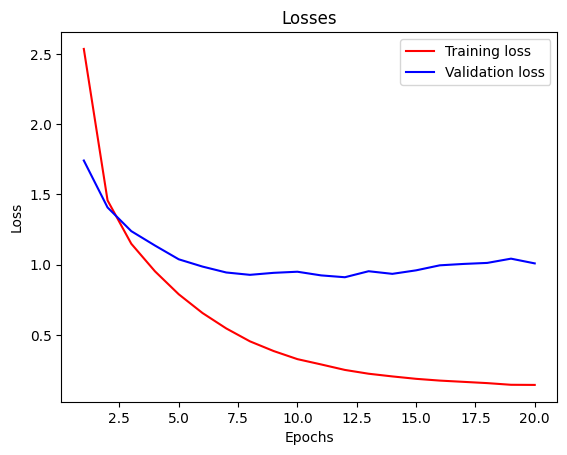

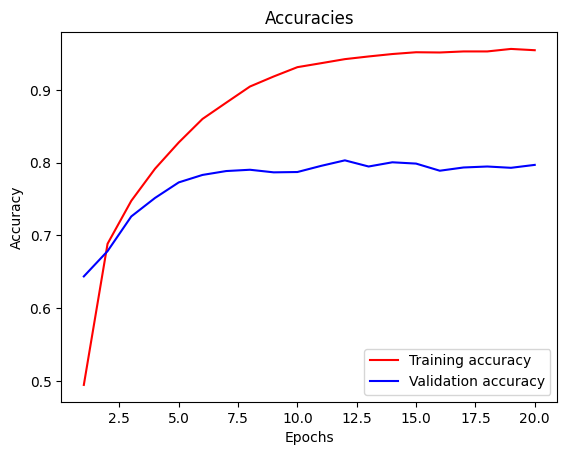

In [16]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
   x_train,
   y_train,
   epochs=20,
   batch_size=512,
   validation_data=(x_test, y_test)
)

plot_losses(history.history)
plot_accuracies(history.history)